Water Jug Problem Solver using BFS
----------------------------------

Solving for jugs with capacities 4L and 3L to measure 3L...

Solution path (BFS): [(0, 0), (0, 3)]

Steps to solve:
Step 1: From (0, 0) to (0, 3)


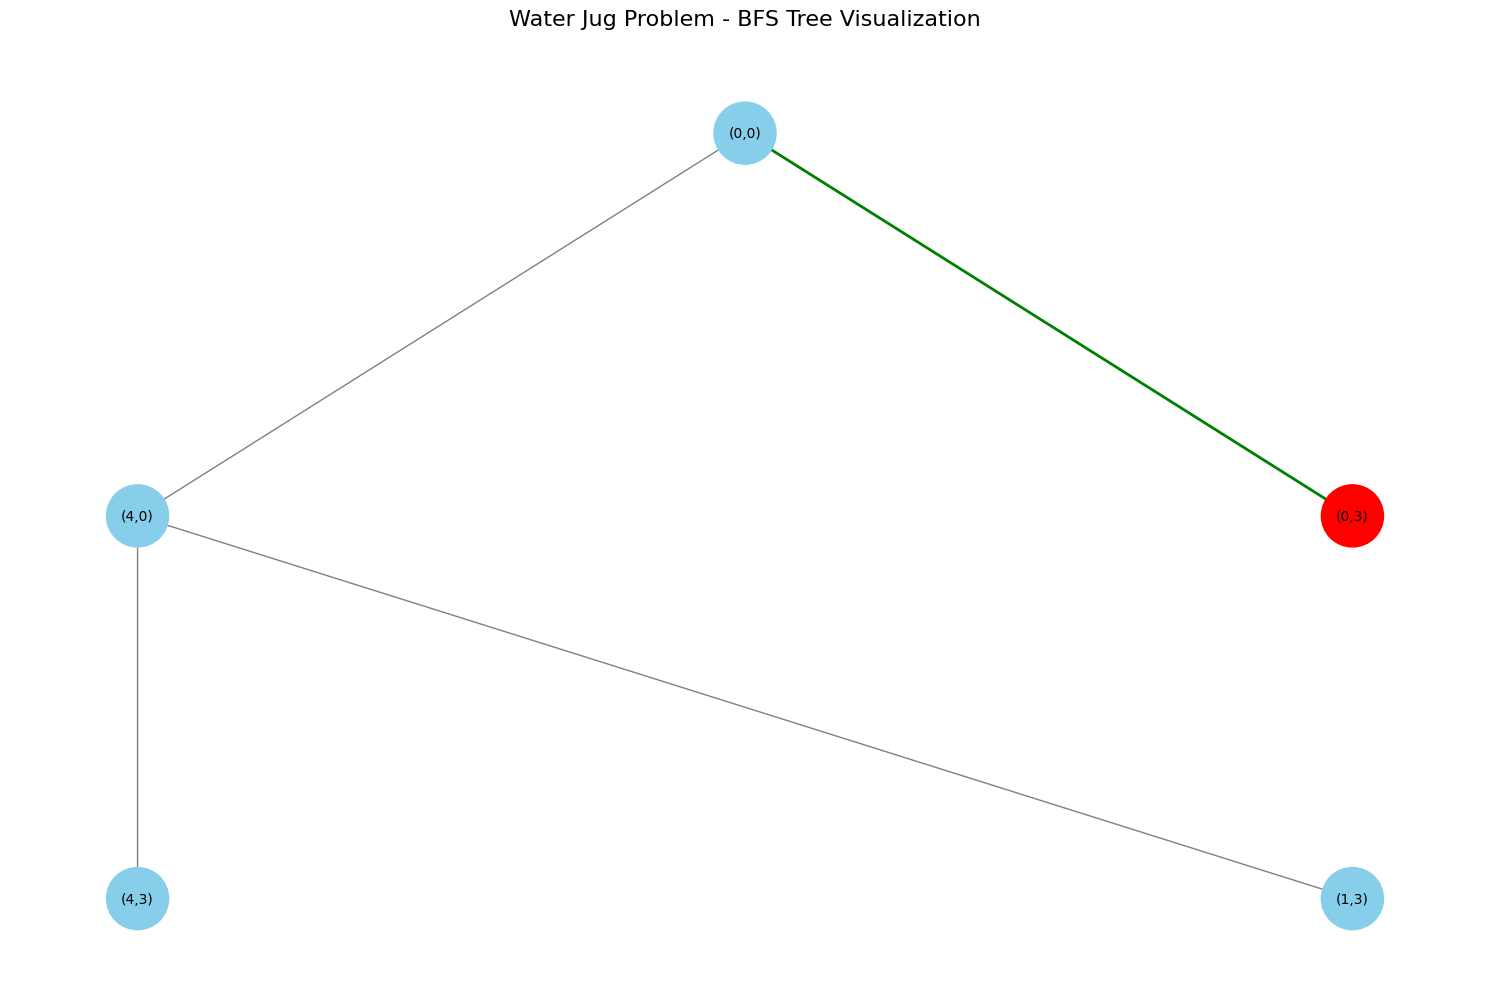

Thank you for using the Water Jug Problem Solver!


In [1]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

def is_goal_state(state, z):
    return state[0] == z or state[1] == z

def generate_next_states(state, max_x, max_y):
    x, y = state
    return [
        (max_x, y),  # Fill jug X
        (x, max_y),  # Fill jug Y
        (0, y),      # Empty jug X
        (x, 0),      # Empty jug Y
        (x - min(x, max_y - y), y + min(x, max_y - y)),  # Pour X -> Y
        (x + min(y, max_x - x), y - min(y, max_x - x))   # Pour Y -> X
    ]

def draw_tree(graph, goal_state=None, path=None):
    plt.figure(figsize=(15, 10))
    
    # Get the levels for each node
    levels = nx.get_node_attributes(graph, 'subset')
    
    # Create a hierarchical layout
    pos = {}
    nodes_by_level = {}

    # Group nodes by level
    for node, level in levels.items():
        if level not in nodes_by_level:
            nodes_by_level[level] = []
        nodes_by_level[level].append(node)
    
    # Calculate positions for each node
    max_nodes_in_level = max(len(nodes) for nodes in nodes_by_level.values())
    for level, nodes in nodes_by_level.items():
        n_nodes = len(nodes)
        for i, node in enumerate(nodes):
            # Center the nodes at each level
            x = (i - (n_nodes - 1)/2) * (15.0/max_nodes_in_level)
            y = -level * 1.5  # Negative to grow downward
            pos[node] = (x, y)
    
    # Draw all edges first (default gray)
    nx.draw_networkx_edges(graph, pos, edge_color='gray', arrows=True,
                           arrowsize=20, arrowstyle='->')

    # Highlight the solution path if provided
    if path:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, 
                               edge_color='green', width=2,
                               arrows=True, arrowsize=20, arrowstyle='->')

    # Default node color
    node_colors = ['skyblue' if node != goal_state else 'red' for node in graph.nodes()]
    
    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, 
                           node_size=2000, node_shape='o')

    # Draw labels
    labels = {node: f'({node[0]},{node[1]})' for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels, font_size=10)
    
    plt.title("Water Jug Problem - BFS Tree Visualization", pad=20, size=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def bfs_water_jug(x, y, z):
    if z > max(x, y):
        print("Impossible to measure this amount.")
        return
    
    queue = deque([(0, 0)])
    visited = set()
    parent = {}
    graph = nx.DiGraph()
    
    # Initialize the starting node
    graph.add_node((0, 0), subset=0)
    levels = {(0, 0): 0}
    
    while queue:
        state = queue.popleft()
        if state in visited:
            continue
            
        visited.add(state)
        
        if is_goal_state(state, z):
            path = []
            current = state
            while current is not None:
                path.append(current)
                current = parent.get(current)
            path = path[::-1]
            
            print("\nSolution path (BFS):", path)
            print("\nSteps to solve:")
            for i in range(len(path)-1):
                print(f"Step {i+1}: From {path[i]} to {path[i+1]}")
            
            draw_tree(graph, goal_state=state, path=path)
            return
        
        for next_state in generate_next_states(state, x, y):
            if next_state not in visited and next_state not in queue:
                queue.append(next_state)
                parent[next_state] = state
                
                level = levels[state] + 1
                graph.add_node(next_state, subset=level)
                graph.add_edge(state, next_state)
                levels[next_state] = level
    
    print("No solution found (BFS).")
    draw_tree(graph)

def main():
    print("Water Jug Problem Solver using BFS")
    print("----------------------------------")
    
    while True:
        try:
            x = int(input("\nEnter capacity of jug X: "))
            y = int(input("Enter capacity of jug Y: "))
            z = int(input("Enter target amount Z: "))
            
            if x <= 0 or y <= 0 or z < 0:
                print("Please enter positive numbers (target can be 0)")
                continue
                
            print(f"\nSolving for jugs with capacities {x}L and {y}L to measure {z}L...")
            bfs_water_jug(x, y, z)
            
            choice = input("\nWould you like to solve another problem? (yes/no): ").lower()
            if choice not in ['yes', 'y']:
                print("Thank you for using the Water Jug Problem Solver!")
                break
                
        except ValueError:
            print("Please enter valid numbers.")

if __name__ == "__main__":
    main()
